In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def read_file(filename):
    img=cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    plt.show()
    return img

    

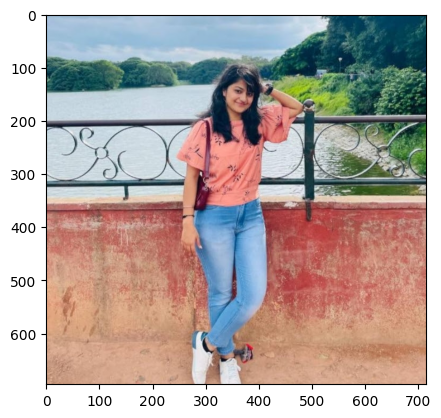

In [31]:
filename ="aaliya.jpg"
img = read_file(filename)

org_img = np.copy(img)

In [32]:

def edge_mask(img, line_size,blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, line_size, blur_value)
    return edges

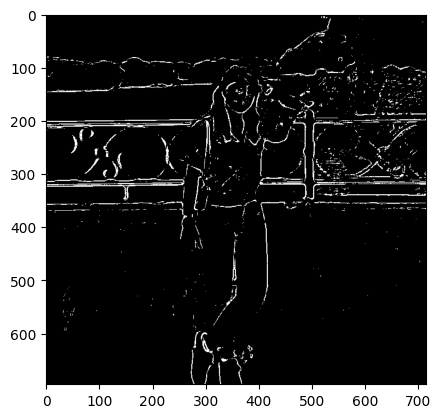

In [33]:
line_size, blur_value = 5,7
edges = edge_mask(img , line_size,blur_value)
plt.imshow(edges, cmap ="binary")
plt.show()

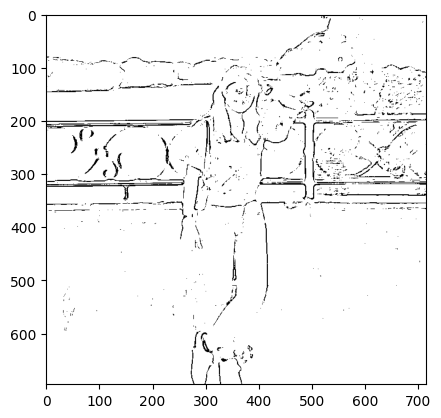

In [34]:
line_size, blur_value = 5,7
edges = edge_mask(img , line_size,blur_value)
plt.imshow(edges, cmap ="gray")
plt.show()

In [35]:
def color_quantization(img , k):

    data = np.float32(img).reshape((-1,3))

    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20,0.001)



    ret, label , center = cv2.kmeans(data,k, None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

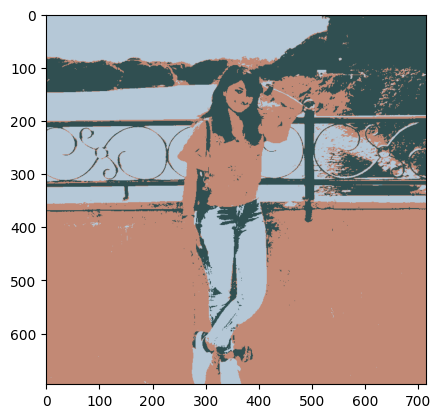

In [36]:
img = color_quantization(img, k=3)
plt.imshow(img)
plt.show()

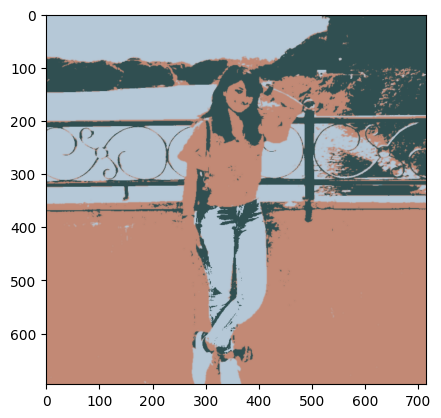

In [37]:
blurred = cv2.bilateralFilter(img , d=4, sigmaColor=150, sigmaSpace=150)
plt.imshow(blurred)
plt.show()

In [38]:

def cartoon():
    c= cv2.bitwise_and(blurred , blurred, mask=edges)
    cartooni = cv2.bitwise_and(org_img , org_img, mask=edges)


    plt.imshow(org_img)
    plt.title("original Image")
    plt.show()

    plt.imshow(cartooni)
    plt.title("cartoonify")
    plt.show()


    plt.imshow(c)
    plt.title("Cartonify Image after blur effect")
    plt.show()
    

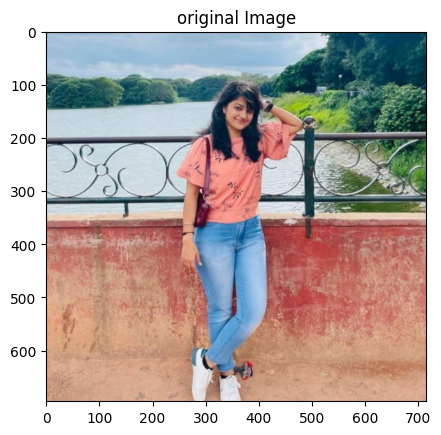

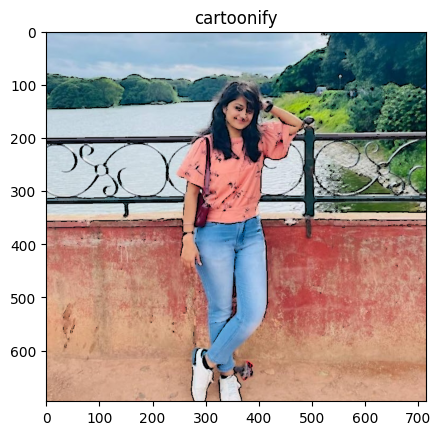

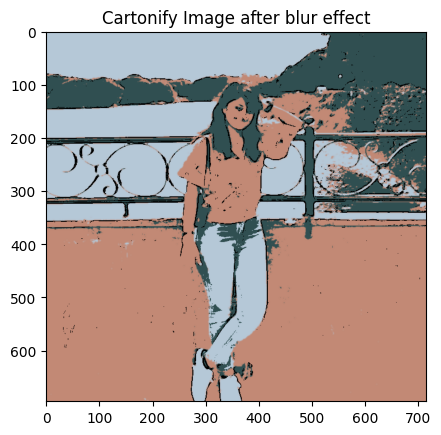

In [39]:
cartoon()

In [40]:
def save(ReSized6, ImagePath):
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

In [41]:
cv2.imwrite('./example.png',blurred)

True

In [42]:
cv2.imwrite('./example2.png',cartooni)

NameError: name 'cartooni' is not defined